<a href="https://colab.research.google.com/github/Manohar729/Repository/blob/main/ibm_scholarship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Necessary Libraries required for reading the tsv file of the restaurant reviews**

Here, we use google drive



In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import numpy as np   #linear Algebra
import pandas as pd #data processing, CSV file I/O
data=pd.read_csv("/content/drive/MyDrive/Restaurant_Reviews.tsv",delimiter='\t',quoting=3)


Mounted at /content/drive/


We analyse the data here with various commands

In [2]:
data.shape
data.columns
data.head #to look at the reviwes

<bound method NDFrame.head of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [3]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

# Data preprocessing

We import "stopwords" from the ntlk library so we can use it to remove unnecessary words in the reviews

As for the technique we are using, we use SVC (Support Vector Classifier)

In [4]:
import nltk #Natural Language Toolkit, is a Python package that you can use for NLP
import re   #regular expressions
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
# Cleaning the reviews
corpus=[]
for i in range(0,1000):
  #Cleaning special character from the reviews
  review=re.sub(pattern='[^a-zA-Z]',repl=" ",string=data['Review'][i])
  review=review.lower()
  review_words=review.split()

  #  Removing the stop words
  review_words=[word for word in review_words if not word in set(stopwords.words('english'))]

  ps=PorterStemmer()
  review=[ps.stem(word) for word in review_words]

  # Joining the words
  review=' '.join(review)

  # creating a corpus
  corpus.append(review)

  corpus[:1500]


# Split data
Here we use tfidf vectorizer for the model creation then split it into training and testing purposes so we can get results on unseen data as well

In [11]:
tfidf_vectorizer = TfidfVectorizer(max_features=1500)
X = tfidf_vectorizer.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values
from sklearn.model_selection import train_test_split #use to split the original data into training data & test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

#with this preprocessing of the data is done we'll now move to train the model


((800, 1500), (200, 1500), (800,), (200,))

# Model Training

Support Vector Classifier (SVC):Support Vector Classifier (SVC) is a supervised machine learning algorithm used for binary classification tasks by finding the optimal hyperplane that maximizes the margin between two classes.

In [12]:
classifier = SVC(kernel='poly', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [13]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0])

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1=accuracy_score(y_test,y_pred)
score2=precision_score(y_test,y_pred)
score3=recall_score(y_test,y_pred)
print("---------scores---------")
print("Accuracy score is : {}%".format(round(score1*100,2)))
print("Precison score is : {}%".format(round(score2*100,2)))
print("recall score is : {}%".format(round(score3*100,2)))

---------scores---------
Accuracy score is : 76.5%
Precison score is : 81.82%
recall score is : 69.9%


In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

# Confusion matrix

We create a confusion matrx to help with the classification and explain its performance

In [16]:
cm


array([[81, 16],
       [31, 72]])

Now we plot the confusion matrix

Text(95.72222222222221, 0.5, 'Actual values')

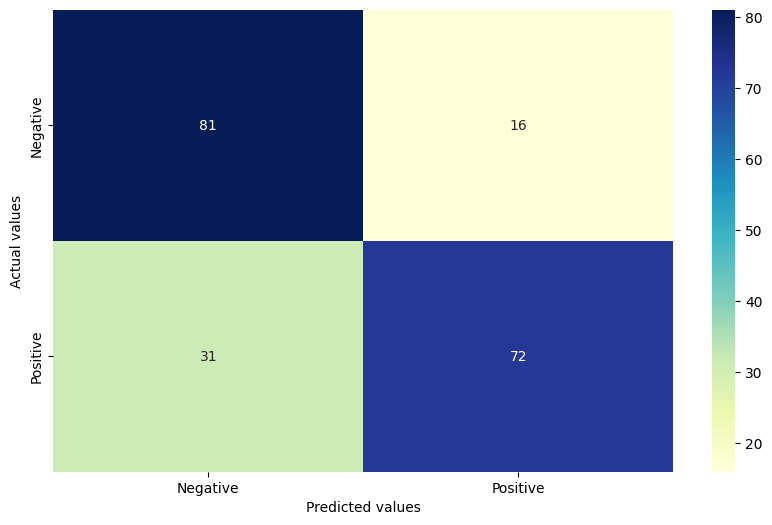

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

random_states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

best_state = None
best_accuracy = 0.0

for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state)
    classifier = SVC(kernel='poly', random_state=random_state)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_state = random_state

print(f"Best Random State: {best_state}")
print(f"Best Accuracy: {best_accuracy}")

final_classifier = SVC(kernel='poly', random_state=best_state)
final_classifier.fit(X_train, y_train)
y_pred_final = final_classifier.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Average of Classifier Accuracy: {final_accuracy}")



Best Random State: 6
Best Accuracy: 0.825
Average of Classifier Accuracy: 0.775


In [37]:
classifier = SVC(kernel='poly', random_state=6)
classifier.fit(X_train, y_train)


SVC(kernel='poly', random_state=6)

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1=accuracy_score(y_test,y_pred)
score2=precision_score(y_test,y_pred)
score3=recall_score(y_test,y_pred)
print("---------scores---------")
print("Accuracy score is : {}%".format(round(score1*100,2)))
print("Precison score is : {}%".format(round(score2*100,2)))
print("recall score is : {}%".format(round(score3*100,2)))

---------scores---------
Accuracy score is : 77.5%
Precison score is : 75.7%
recall score is : 81.0%


# Model Trained
We have gotten a good score of accuracy, precision and recall rate of this reviews after carefully selecting our model

In [36]:
cm

array([[74, 26],
       [19, 81]])

Text(95.72222222222221, 0.5, 'Actual values')

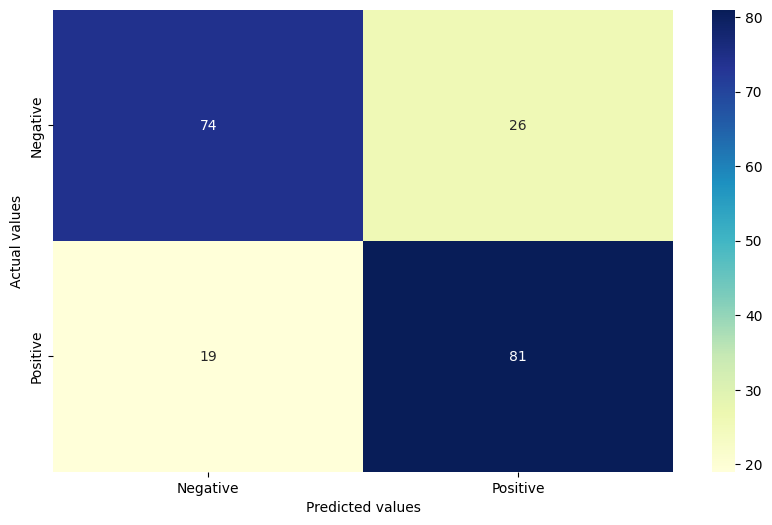

In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [38]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)
    temp = tfidf_vectorizer.transform([final_review]).toarray()
    return classifier.predict(temp)



sample_review="the restaurant food was very good but service was not satisfactory"
if predict_sentiment(sample_review):
  print("This is a Positive review")
else:
  print("This is a Negative review")

This is a Positive review


In [39]:
sample_review=" food and ambience were very excellent"
if predict_sentiment(sample_review):
  print("This is a Positive review")
else:
  print("This is a Negative review")


This is a Positive review


In [40]:
sample_review="Food is not worth it and was not satisfies with waiter"
if predict_sentiment(sample_review):
  print("This is a Positive review")
else:
  print("This is a Negative review")

This is a Negative review
